Rejection Sampling
Rejection sampling is a basic Monte Carlo technique to generate observations from a specified
distribution with probability density function (pdf) f(x). In practice, it is used to
draw random variables from a target distribution, f(x), when directly sampling from that
distribution is difficult. The basic idea is to instead sample from a reference distribution,
g(x), which a) is easy to draw from and b) satisfies the condition that g(x) > 0 whenever
f(x) > 0, and to then selectively accept samples such that sampling from f is achieved.
The basic rejection sampling algorithm is the following:

Begin with a reference distribution, g and a scalar M such that f(x) < Mg(x) for all
x.
• Until a specified number of samples is achieved:
1. Sample a candidate, xc, from g(x) and a value u from a uniform distribution over
[0, 1] (Hint: See scipy.stats.uniform)
2. if u < f(x_c)
M g(x_c)
then accept xc as a sample from f(x), else reject xc.

# Part a

In [1]:
import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import math

In [17]:
norm.rvs()

-0.10396372109857019

In [21]:
norm.rvs(size = 3)[0]

-1.6838231466346709

In [11]:
#############################################################
###--------------- Target Distribution -------------------###
#############################################################

def target_func(x):
    '''
    Input: scalar
    Description: a sample target function
    '''
    return(x/5)

def oneD_rej_sample(target_dist, ref_dist, sample_size, m):
    '''
    Input: 
        target_dist - target distribution
        ref_dist - reference distribution
        sample_size - desired sample size
        m - scalar m such that f(x) < m g(x)
    Output: a list of samples, prints the value of m, and the percentage of samples that were accepted
    Description:
    '''
    samples = []      # Initializing samples
    rejects = []      # Initializing rejected samples
    
    ref = ref_dist
    tar = target_dist
    n = sample_size
    
    while len(samples) < n:
        x = ref.rvs(size = 1)[0]
        u = scipy.stats.uniform.rvs(size=1)[0]
        #------- Rejection Sampling Step --------#
        if u < (tar(x)/float(m*ref.pdf(x))): 
            samples.append(x)
        else:
            rejects.append(x)
        
    perc = 100*(len(samples)/(len(samples) + len(rejects)))
        
    print("samples: \n", samples, "\n", "m = ", m, "\n", "% accepted", perc, "%")
    return(samples)
    
result = oneD_rej_sample(target_func, scipy.stats.norm(0,1), 20, 2)
    

samples: 
 [2.119228278220552, 1.1036692170746363, 0.46062872041610459, 0.79055835833143329, 0.6226794276681582, 1.380403237159642, 0.90565572602203848, 0.89636003119376073, 1.6444935332861661, 1.5284486152517689, 1.7859813487474532, 1.0557197367679845, 1.1292154282606475, 1.9700329548383408, 1.900608182554397, 1.7149758010347023, 1.5378239549487243, 0.94749291997505936, 1.8720703365599058, 0.69022694526092143] 
 m =  2 
 % accepted 15.037593984962406 %


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 3.,  0.,  2.,  2.,  2.,  3.,  3.,  2.,  2.,  1.]),
 array([ 0.57295123,  0.70973248,  0.84651372,  0.98329497,  1.12007621,
         1.25685746,  1.3936387 ,  1.53041995,  1.66720119,  1.80398244,
         1.94076368]),
 <a list of 10 Patch objects>)

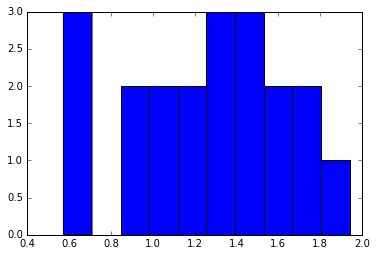

In [64]:
hist(result)

In [60]:
scipy.stats.norm(0,1).rvs()

-1.4242811012593402

In [54]:
scipy.stats.norm?

# Part b: 
The Laplace distribution (a.k.a. double exponential distribution) has the pdf
f(x) = 1
2b
exp
−
|x − µ|
b
!
(1)
Use your rejection sampler to draw a sample of size 1000 from the Laplace distribution
with parameters µ = 0, b = 1. Use a Cauchy distribution as the reference distribution.
Plot a histogram of your samples, over-plotting the true Laplace pdf. Use a
Kolmogorov-Smirnov test to test the hypothesis that your sample was drawn from a
Laplace(0,1) distribution.

In [12]:
def laplace(x):
    import math
    b=1
    mu=0
    return (1/float(2*b))*math.exp((-(math.fabs(x-mu))/b))

In [13]:
def target_func(x):
    '''
    Input: scalar
    Description: a sample target function - Laplace in this case
    '''
    ans = (1/2)*exp(-abs(x))
    return ans

False

In [72]:
scipy.stats.cauchy.rvs()

-0.76272565265240344

In [14]:
m = 3.24
laplacian_sample = oneD_rej_sample(target_func, scipy.stats.cauchy, 1000, m)

samples: 
 [-1.4585519101051707, -1.0570404512146727, 0.52438612812472551, -1.5954366061162297, -0.39628687699713794, 1.5508209436060199, 0.16757820275094848, -0.47946571689636264, -0.27292908349583883, -2.0759609215885617, 1.4470778795034718, -0.63845513218729566, 1.11502538201646, -0.18318383938258045, -0.81683996937243086, -2.2731444339356597, -1.011252068959543, -0.042680436954556381, 1.1431332345741538, 3.1629906921918725, -0.033549411716493352, -0.98711821089685847, 1.0415565493183401, -2.0055200951193255, -1.9579708887966492, 0.41601841760579772, 0.78185336032709163, -0.54279887705604013, -2.9016695580509375, 2.1694909402955354, 0.68008234683719404, 0.35546221513787896, -0.69694844110778242, -0.80880279218951812, 0.12536123023237589, 3.2303823965358611, 0.03332465491900128, -1.2935218399015069, 3.2596554298938178, -0.33745579523955721, -0.72604355598585546, -0.084234561388693785, -0.10446293489435761, -1.4849684050956042, 2.3697269831240515, 0.62266789831183456, -0.0617941342133

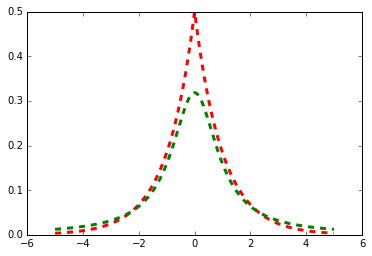

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  6.3944969387e-59


In [10]:
#over plot true Laplace pdf
x = np.arange(-5,5,.005)
laplace_pdf = np.arange(-5,5,.005)
cauchy_pdf = np.arange(-5,5, .005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
    cauchy_pdf[i]= scipy.stats.cauchy.pdf(float(x[i]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, laplace_pdf, 'r--', linewidth=3)
ax.plot(x, cauchy_pdf, 'g--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(cauchy_pdf, laplace_pdf)
print("pvalue = ", pvalue)

In [111]:
scipy.stats.ks_2samp?

In [113]:
scipy.stats.laplace.rvs?

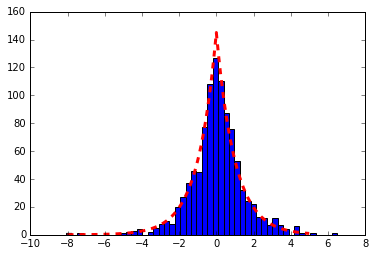

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  0.334415875815


In [15]:
#plot histogram of samples
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(laplacian_sample,bins=50)

#over plot true Laplace pdf
x = np.arange(-8,5,.005)
laplace_pdf = np.arange(-8,5,.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,580/2*laplace_pdf, 'r--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(laplacian_sample, scipy.stats.laplace.rvs(size = 1000))
print("pvalue = ", pvalue)


### Result Interpretation
We fail to reject the null hypothesis at the 5% significance level and conclude that we cannot statistically differentiate the generated sample from that generated directly from the Laplace distribution.

In [81]:
scipy.stats.laplace.pdf?

## Part c: 

In [122]:
m = 2
laplacian_sample = oneD_rej_sample(target_func, scipy.stats.t(df = 2), 1000, m)

samples: 
 [-0.1172518916366332, 1.4550271609641021, -0.07094754759696742, -0.046481501271075198, 0.68019291644189162, -0.35131141017862672, -0.54749493391788218, -0.42925323735412407, -0.05344950980411526, 0.17045635834118808, -0.96192317141093919, -0.21434272372563368, -1.7752423716291472, 0.49836779256964264, -1.6244617573147386, 0.92723128227773832, -0.07847067681350256, -0.17939621859490365, 1.026946054566102, 0.35631831962580612, 0.71931218076138181, -0.071511063402215094, -0.048719714369096723, -0.51452201099406281, -0.69594837873239657, 0.35822450368603603, 3.3898298360700436, 2.2774184920713849, 1.5838341103443929, -1.2790892753581051, 1.5426325673501073, -0.56293167547333844, 0.4294965277263369, -0.2888015614167157, 1.8134431042635608, 0.21122618117789774, 0.36570355877457811, 0.1019983023693444, 0.28004294351497755, -0.2716121647418317, 1.2128898379457926, -0.67131244323018269, 0.30536837920439641, 1.3312222417048158, -1.9785995275881814, 1.0125562557113019, -0.7599894402184

In [125]:
scipy.stats.t.pdf?

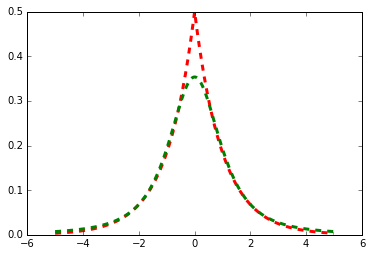

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  4.02585351088e-20


In [128]:
#over plot true Laplace pdf
x = np.arange(-5,5,.005)
laplace_pdf = np.arange(-5,5,.005)
t_pdf = np.arange(-5,5, .005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
    t_pdf[i]= scipy.stats.t.pdf(df = 2, x = float(x[i]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, laplace_pdf, 'r--', linewidth=3)
ax.plot(x, t_pdf, 'g--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(t_pdf, laplace_pdf)
print("pvalue = ", pvalue)

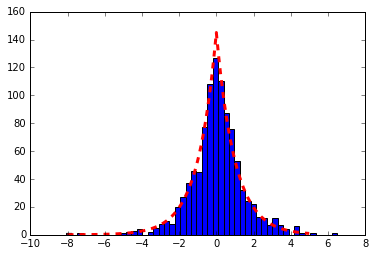

doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian
pvalue =  0.11672592544


In [16]:
#plot histogram of samples
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(laplacian_sample,bins=50)

#over plot true Laplace pdf
x = np.arange(-8,5,.005)
laplace_pdf = np.arange(-8,5,.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,580/2*laplace_pdf, 'r--', linewidth=3)
#show plot
plt.show()	
print("doing kolmogorov-smirnof test to compare rejection sampling output to real pdf of laplacian")
ks_statistic, pvalue = scipy.stats.ks_2samp(laplacian_sample, scipy.stats.laplace.rvs(size = 40))
print("pvalue = ", pvalue)

### Result Interpretation
We fail to reject the null hypothesis at the 5% significance level and conclude that we cannot statistically differentiate the generated sample from that generated directly from the Laplace distribution.